# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Общая информация

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Информация о фрейме

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Подсчитываем дубликаты 

In [3]:
data.duplicated().sum()

0

### Пустые значения 

In [4]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Строим гистограмму 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

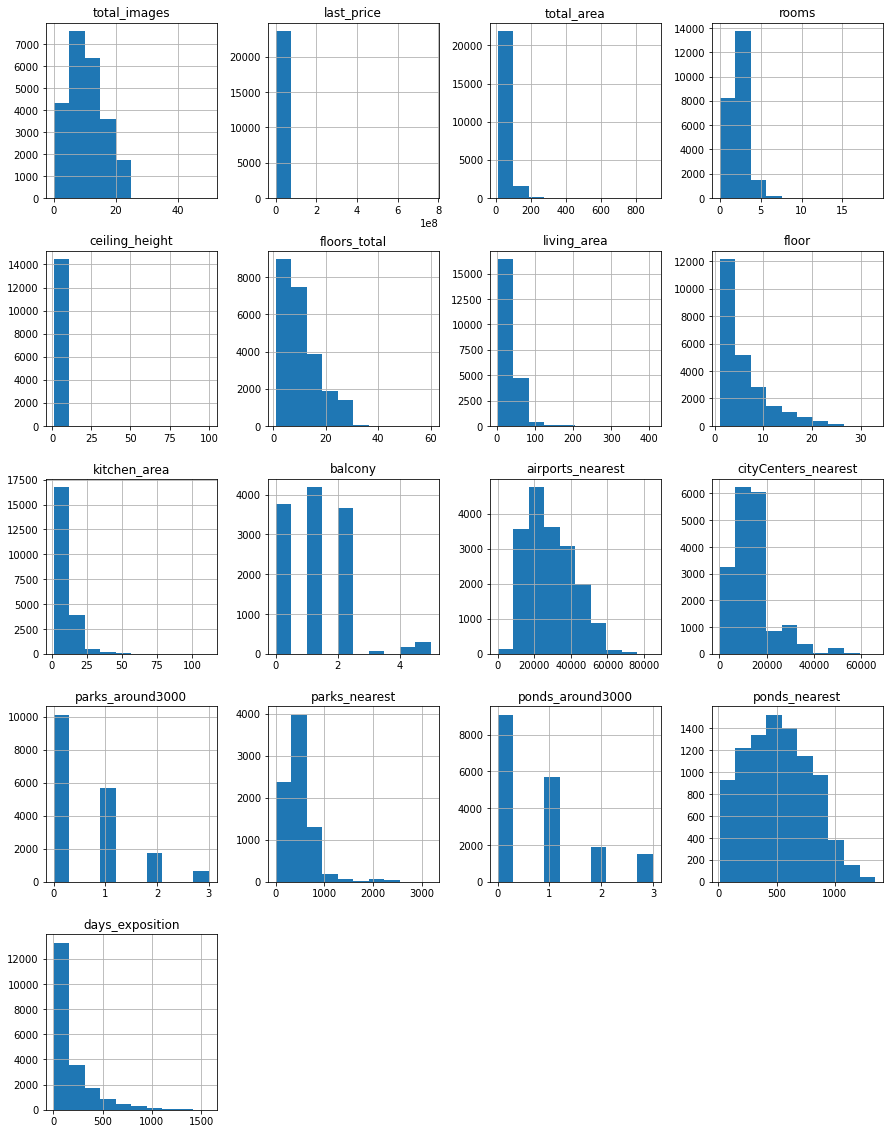

In [5]:
data.hist(figsize=(15, 20))

### Вывод по первой части: Данных для исследования достаточно, записей 23699. Явные дубликаты отсутствуют. Согласно гистограммам анномальных значений мало. Пустых значений в некоторых столбцах много, рассмотрим данные в следующей части. 

## Предобработка данных

### Необходимо привести все столбцы к "хорощему стилю", переименнуем cityCenters_nearest

In [6]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

### Заполняем пустые значения 

In [7]:
#total_images
data['total_images'].astype('int')


#last_price
data['last_price'].astype('int')


#ceiling_height
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


#first_day_exposition
#переведем в подобающий формат 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


#is_apartment
data['is_apartment'].unique() 
#скорее всего, не указано, в том случае, если не являются аппартаментами. Можем заполнить значениями False. Поменяем также тип данных с object на bool. 
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype(bool)
#посчитаем соотношение аппартаментов и квартир 
data['is_apartment'].mean()
#получаем, что из общего списка недвижиммости, к аппартаментам относится 0.21%

    
#balcony
#Аналогично, как и с площадью кухни, если данные не заполнены, то скорее всего балкона нет
#изменим тип с float64 на int, т.к. число точно должно быть целым 
data['balcony'].unique()
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype(int)


#airports_nearest
data['airports_nearest'].unique()
#данные по данному столбцу нельзя заполнить, скорее всего рядом его нет 


#city_centers_nearest
data['city_centers_nearest'].unique()
#данные по данному столбцу нельзя заполнить, скорее всего центр города далеко


#parks_around3000 и ponds_around3000
data['parks_around3000'].unique()
data['ponds_around3000'].unique()
#Логично, что если данные отсутствуют, то водоемов и парков рядом нет 
#data['parks_around3000'] = data['parks_around3000'].fillna(0)
#data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
#Необходимо изменить тип данных на int, т.к. либо парки и водоемы есть рядом, либо их нет 
#data['parks_around3000'] = data['parks_around3000'].astype(int)
#data['ponds_around3000'] = data['ponds_around3000'].astype(int)


#parks_nearest и ponds_nearest
#данные по столбцу нельзя заполнить, скорее всего парки и водоемы слишком далеко, поэтому пропуски в значениях 



#------------------------------------------------------------------------------------------------
# 1.1 kitchen_area
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'] / data.groupby('total_area')['kitchen_area'].transform('median') * data['total_area'].median()) 
    

# 1.2 living_area
living = data.groupby('total_area')['living_area'].median()
data['living_area'] = data['living_area'].fillna(data['living_area'].median() / data['total_area'].median() * data['total_area'].median())


#days_exposition скорее всего утеряна данные за 2019 год 
data['year_pub'] = data['first_day_exposition'].dt.year
data.groupby('year_pub')['days_exposition'].count()


#locality_name 
#Мы знаем, что пропущено 49 значений, но заполнить данную информацию невозможно, так как неизвестно, где точно располагается квартира, заполним пропуски значением 'noinfo'
#data['locality_name'] = data[data['locality_name'] != '']



#Где это было возможно пропуски заполнены, проверим заполнение
data.isnull().sum()

#data['living_area'].describe()

#Остались пустые значения только там, где не представляется возможность заполнить 


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
year_pub                    0
dtype: int64

In [8]:
# код ревьюера
import datetime as dt

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_year'] = data['first_day_exposition'].dt.year
data[data['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,959,1796


### Необходимо привести все названия населённых пунктов к одному формату


In [9]:
#data['locality_name'].unique()
#len(data['locality_name'].unique())
data['locality_name'] = data['locality_name'].str.lower()
#Необходимо изменить во всех наименованиях букву "ё" на "е", чтобы привести все названия населённых пунктов к одному формату 
data['locality_name'] = data['locality_name'].str.replace('ё','е').replace(['посёлок', 'городской посёлок'], '', regex=True) 


### В ходе работы над второй частью: 
- Привели наименования столбцов к "хорошему стилю" 
- Заполнили пропуски, где это было возможно 
- Изменили тип данных в тех местах, где это было необходимо 
- Привели к одному формату все названия населённых пунктов


## Новые столбцы

In [10]:
#цена одного квадратного метра (2 знака после запятой)
data['price_msq'] = (data['last_price'] / data['total_area']).round(2)

#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_pub'] = data['first_day_exposition'].dt.weekday 

#месяц публикации объявления
data['month_pub'] = data['first_day_exposition'].dt.month

#год публикации объявления
data['year_pub'] = data['first_day_exposition'].dt.year

#тип этажа квартиры (значения — «первый», «последний», «другой»);
def floor(x):
    if x['floor'] == 1:
        return 'первый'
    if x['floor'] == x['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['type_apart_floor'] = data.apply(floor, axis=1) 

#расстояние до центра города в километрах (округлить до целых км)
data['to_city_center'] = (data['city_centers_nearest'] / 1000).round(0)

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,year_pub,first_day_year,price_msq,day_pub,month_pub,type_apart_floor,to_city_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,2.0,755.0,NaN,2019,2019,120370.37,3,3,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,0,...,0.0,NaN,81.0,2018,2018,82920.79,1,12,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,0,...,2.0,574.0,558.0,2015,2015,92785.71,3,8,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,0,...,3.0,234.0,424.0,2015,2015,408176.10,4,7,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,1.0,48.0,121.0,2018,2018,100000.00,1,6,другой,8.0


### В ходе работы над третьей частью добавлены новые столбцы согласно заданию 

## Проведите исследовательский анализ данных

### Общая площадь

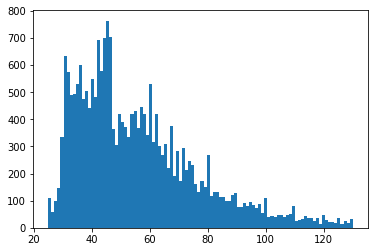

In [11]:
data['total_area'].describe()
# min = 12 
# max = 900
# В основном квартиры находятся в пределах от 25 до 130 кв. м) 
plt.hist(data['total_area'], bins=100, range=(25,130))
plt.show()

#### Вывод: Больше всего квартир площадью от 30 до 64 кв. м., с наибольшим значением около 50 кв. м. 

### Жилая площадь

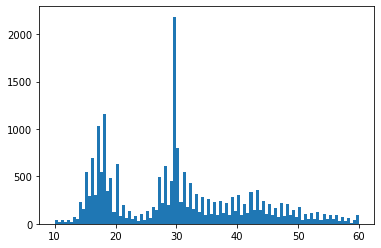

In [12]:
data['living_area'].describe()
#min= 2
#max = 409
plt.hist(data['living_area'], bins=100, range=(10,60))
plt.show()

#### Вывод: Больше всего в продаже квартир, у которых жилая площадь от 15 до 20 кв. м. и от 28 до 35 кв. м. 

### Площадь кухни

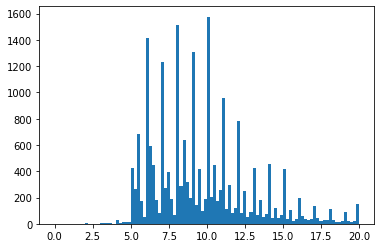

In [13]:
data['kitchen_area'].describe()
#min = 0
#max = 112
plt.hist(data['kitchen_area'], bins=100, range=(0,20))
plt.show()

#### Вывод: Квартиры, у которых указана квадратура, в среднем кухня с 6 кв. м. до 12 кв. м. 

### Цена объекта

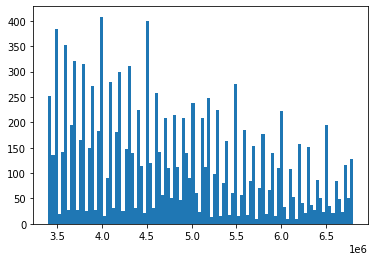

In [14]:
data['last_price'].describe()
#data['last_price'].unique
plt.hist(data['last_price'], bins=100, range=(3.400000e+06, 6.800000e+06))
plt.show()

#### Больше всего квартир продается в ценовом диапозоне от 3.5 до 4.5 млн. рублей 

### Количество комнат

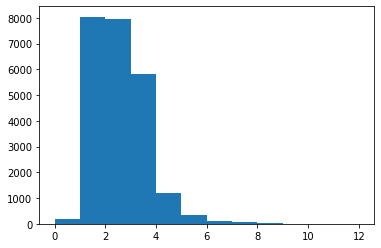

In [15]:
data['rooms'].describe()
plt.hist(data['rooms'], bins=12, range=(0, 12))
plt.show()

#### Вывод: больше всего предложений от 1 до 3 комнат. 

### Высота потолков

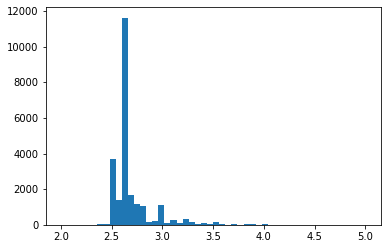

In [16]:
data['ceiling_height'].describe()
plt.hist(data.query('(ceiling_height > 1) & (ceiling_height < 5)')['ceiling_height'], bins=50, range=(2,5))
plt.show()

#### Вывод: В среднем выоста потолков 2.5 - 2.65 м

### Тип этажа квартиры («первый», «последний», «другой»);

<AxesSubplot:title={'center':'Зависимость цены от типа квартиры'}, xlabel='type_apart_floor'>

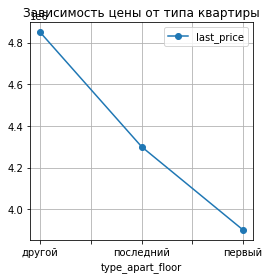

In [17]:
#Здесь логично будет сразу выполнить сравнение зависимости этаж-цена
(
    data.pivot_table(index='type_apart_floor', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(4, 4), title='Зависимость цены от типа квартиры')
)

#### Вывод: Цена уменьшается от другого к последнему, дешевле всего выйдет квартира на первом этаже. 

### Общее количество этажей в доме

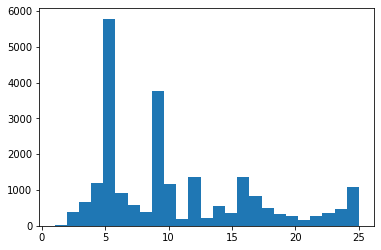

In [18]:
data['floors_total'].describe()
plt.hist(data['floors_total'], bins=25, range=(1, 25))
plt.show()

#### Вывод: Больше всего продают квартиры в 5-этажных и 9-ти этажных домах 

### Расстояние до центра города в метрах

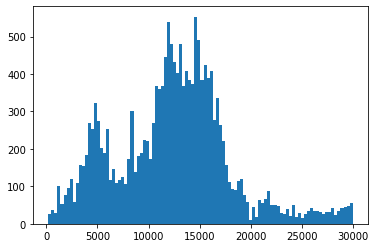

In [19]:
data['city_centers_nearest'].describe()
plt.hist(data['city_centers_nearest'], bins=100, range=(181, 30000))
plt.show()

#### Вывод: Больше всего продается квартир с расстоянием от 10 до 17 км до центра города

### Расстояние до ближайшего парка

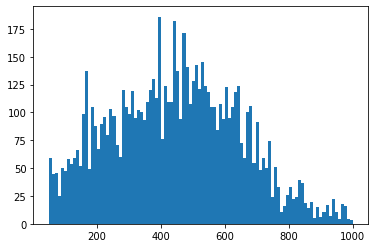

In [20]:
data['parks_nearest'].describe()
plt.hist(data['parks_nearest'], bins=100, range=(50,1000))
plt.show()

#### Вывод: В среднем до парка от 180 до 670 м. 

### Изучите, как быстро продавались квартиры (столбец days_exposition)

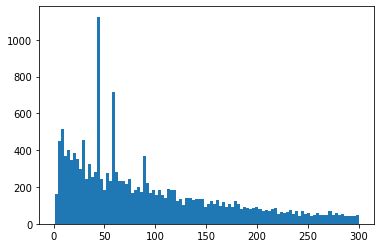

In [21]:
data['days_exposition'].describe()
plt.hist(data['days_exposition'], bins=100, range=(1,300))
plt.show()

#### Вывод: 
Среднее время продажи составляет 180 дней 
Медианное время продажи составляет 95 дня (стоит отталкиваться от этого значения, так как оно не зависит от выбросов) 
Быстрыми продажаи - это продажи за 45 дней (Q1)
Необычно долгие продажи -это продажи, которые длятся более 232 дней (Q3) 

### Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта.

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год)

In [22]:
#Корреляция данных до того, как убрали лишние выбросы 
import numpy as np
print (
data.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms']).corr(),'\n'
)

data.info()


              kitchen_area  living_area     rooms  total_area
kitchen_area      1.000000     0.538269  0.459818    0.678373
living_area       0.538269     1.000000  0.812586    0.862464
rooms             0.459818     0.812586  1.000000    0.784052
total_area        0.678373     0.862464  0.784052    1.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       

In [23]:
#Подготовка данных перед построением графиков и проверкой корреляции 
#Будет составлена функция для того, чтобы оставить только квартильные значения, остальные отбросить как выбросы 
def quart(data, column):
    q_low = data[column].quantile(0.25)
    q_high = data[column].quantile(0.75)
    q_range = q_high - q_low
    q_final = data.loc[(data[column] < q_high + 1.5*q_range) & (data[column] > q_high - 1.5*q_range), column]
    return q_final
# Столбцы с выбросами
new_corr = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms']
for y in new_corr:
    data[y] = quart(data, y)

#Корреляция данных 
print (data.pivot_table(index='last_price', values=['total_area','living_area','kitchen_area','rooms']).corr(),'\n')
data.info()

              kitchen_area  living_area     rooms  total_area
kitchen_area      1.000000     0.299730  0.220826    0.525996
living_area       0.299730     1.000000  0.863032    0.875403
rooms             0.220826     0.863032  1.000000    0.842736
total_area        0.525996     0.875403  0.842736    1.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            20681 non-null  float64       
 2   total_area            22224 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23307 non-null  float64       
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           22811 non-null  float64       

### После того, как мы отбросили все выборы, можем сделать вывод, цена имеет сильную зависимость от размера жил. площади и количества комнат 
    
   
    

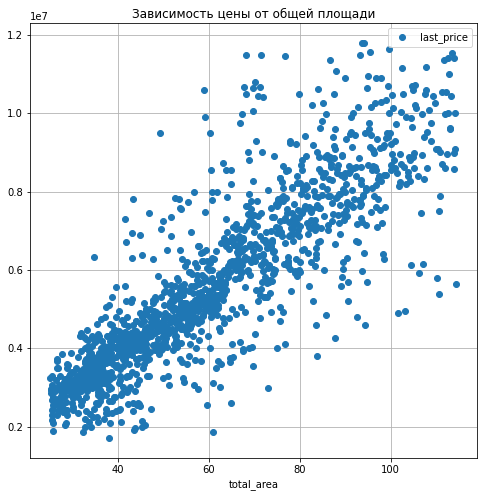

In [25]:
#Зависимость цены от общей площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(8, 8))
)
plt.title('Зависимость цены от общей площади')
plt.show()

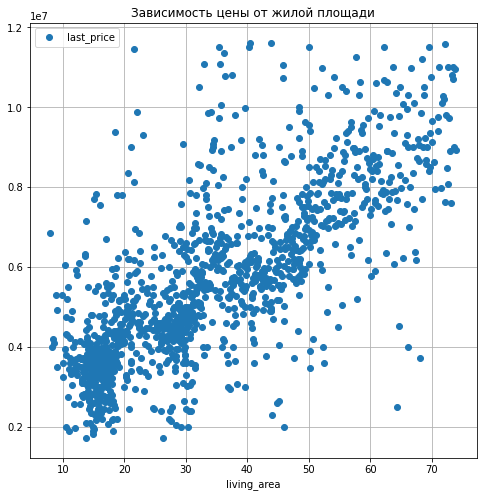

In [26]:
#Зависимость цены от жилой площади
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(8, 8))
)
plt.title('Зависимость цены от жилой площади')
plt.show()

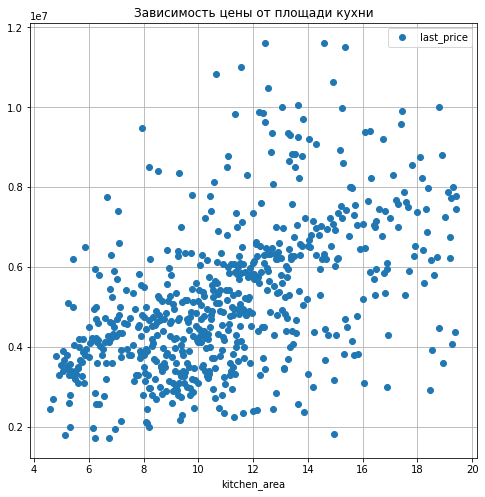

In [27]:
#Зависимость цены от площади кухни
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(8, 8))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

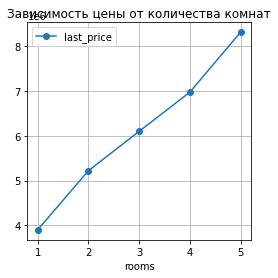

In [28]:
#Зависимость цены от количества комнат
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(4, 4))
)
plt.title('Зависимость цены от количества комнат')
plt.show()

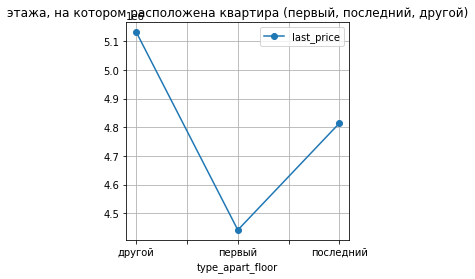

In [29]:
#Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)
(
    data.pivot_table(index='type_apart_floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(4, 4))
)
plt.title('этажа, на котором расположена квартира (первый, последний, другой)')
plt.show()

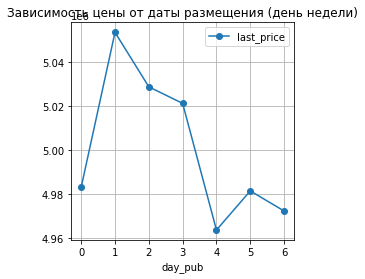

In [30]:
#Зависимость цены от даты размещения (день недели)
(
    data.pivot_table(index='day_pub', values='last_price')
    .plot(grid=True, style='o-', figsize=(4, 4))
)
plt.title('Зависимость цены от даты размещения (день недели)')
plt.show()

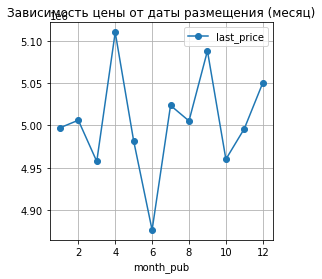

In [31]:
#Зависимость цены от даты размещения (месяц)
(
    data.pivot_table(index='month_pub', values='last_price')
    .plot(grid=True, style='o-', figsize=(4, 4))
)
plt.title('Зависимость цены от даты размещения (месяц)')
plt.show()

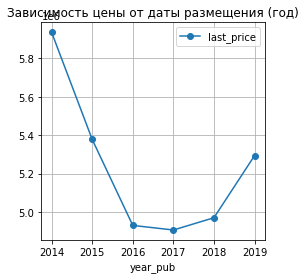

In [32]:
#Зависимость цены от даты размещения (год)
(
    data.pivot_table(index='year_pub', values='last_price')
    .plot(grid=True, style='o-', figsize=(4, 4))
)
plt.title('Зависимость цены от даты размещения (год)')
plt.show()

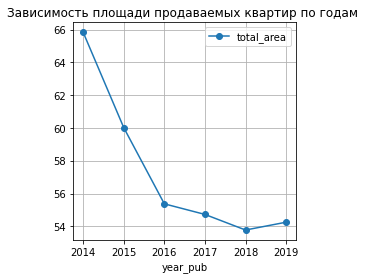

In [33]:
#Зависимость цены от даты размещения (год)
(
    data.pivot_table(index='year_pub', values='total_area')
    .plot(grid=True, style='o-', figsize=(4, 4))
)
plt.title('Зависимость площади продаваемых квартир по годам ')
plt.show()

### Вывод: 
- Больше всего на цену влиет общая площадь квартиры, далее количество комнат (но меньше, чем общая площадь) 
- Квартиры на первом этаже продаются дешевле, чем на любом другом этаже 
- Также можно выделить динамику, что цены с 2017 года имеют тенденцию к росту, но в то же время размер квартир уменьшился 


## Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — сводная таблица с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов.

In [34]:
data_mean_city = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
data_mean_city.columns = ['sum_up']
data_mean_city = data_mean_city.sort_values(by='sum_up', ascending=False).head(10)
data_mean_city['price_msq'] = data.pivot_table(index='locality_name', values='price_msq')
data_mean_city.sort_values(by='price_msq', ascending=False)


,sum_up,price_msq
locality_name,,
санкт-петербург,13729,114849.008793
пушкин,338,103125.819377
деревня кудрово,298,92473.547559
поселок парголово,326,90175.913089
поселок мурино,556,85681.762572
поселок шушары,439,78677.364318
колпино,336,75424.579112
гатчина,296,68746.146515
всеволожск,385,68654.473970


**Больше всего продается квартир и самый дорогой квадратный метр в Санкт-Петербурге, далее следуют Пушкино, Кудрово и так далее. Цена за квадратный в Выборге уступает Санкт-Петербургу в 2 раза** 

## Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

In [35]:
data.query('locality_name == "санкт-петербург"')['to_city_center'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: to_city_center, dtype: float64

In [36]:
data.query('locality_name == "санкт-петербург" and to_city_center<20').pivot_table(values='last_price', index='to_city_center')

,last_price
to_city_center,
0.0,8.398000e+06
1.0,8.145277e+06
2.0,7.970519e+06
3.0,7.346575e+06
4.0,7.632435e+06
5.0,7.661225e+06
6.0,7.108234e+06
7.0,6.635321e+06
8.0,6.617244e+06


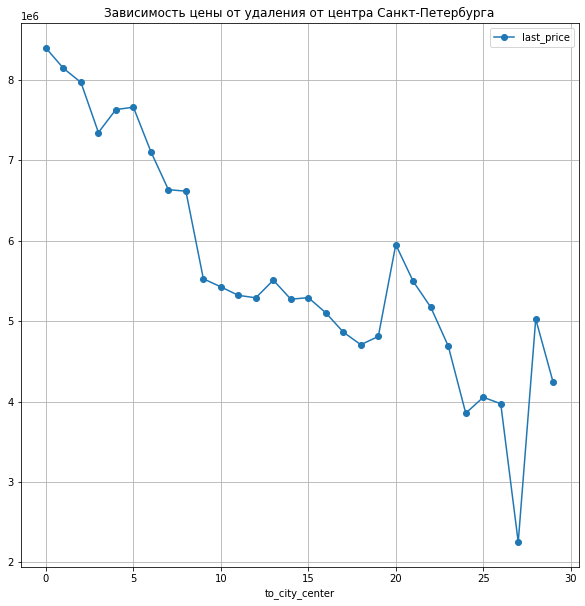

In [37]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='to_city_center', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 10))
)
plt.title('Зависимость цены от удаления от центра Санкт-Петербурга')
plt.show()

**Вывод: чем дальше от центра Санкт-Петербурга, тем дешевле стоимость квартир. На расстоянии от 9 км. до 19 км. стоимость уже перестает зависеть от удаленности. На растоянии 20 км. возможно располагаются частные поселки, с чем связан рост цены. Далее мы наблюдаем падение цены.** 

# Общий вывод - В ходе исследования объявлений о продаже квартир были выполнены следующие этапы и сделаны выводы:

**Часть 1** 
- получена общая информация о данных 
- проверено на наличие явных дубликатов 
- проверено наличие пустых значений 
- построены гистограммы 

**Часть 2** 

- привели наименования столбцов к "хорошему стилю" 
- заполнили пустые значения, где это было возможно.  
- изменили тип данных, там где это было необходимо 
Стоит отметить, что наличие пустых значений скорее всего всего свяазно с тем, что заполнение данных чек-боксов не является обязательным в сервисе, соответственно данные отсутствуют. Также не стоит исключать проблемы при выгрузке данных. 

**Часть 3** 

Добавлены новые столбцы в таблицу согласно заданию, а именно 
- price_msq - цена квадратного метра объекта с точностью до двух знаков после запятой.
- day_pub - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
- month_pub - месяц публикации объявления.
- year_pub - год публикации объявления.
- type_apart_floor - тип этажа квартиры (значения — «первый», «последний», «другой»).
- to_city_center - расстояние до центра города в целых километрах.

**Часть 4** 

Проведена работа с данными, а именно
- Избавились от выбросов 
- Выведена корреляция 
- Проверили, что сохранилась большая часть данных, значит исследование можно продолжить 

Изучены общие показатели квартир, которые продавались
- Больше всего квартир площадью от 30 до 64 кв. м., с наибольшим значением около 50 кв. м.
- Больше всего в продаже квартир, у которых жилая площадь от 15 до 20 кв. м. и от 28 до 35 кв. м.
- В среднем кухня с 6 кв. м. до 12 кв. м. 
- Больше всего квартир продается в ценовом диапозоне от 3.5 до 4.5 млн. рублей
- Больше всего предложений от 1 до 3 комнат.
- В среднем выоста потолков 2.5 - 2.65 м
- Цена зависит от этажа. Самый дешевый варинт это первый этаж, затем последний, далее другие этажи
- Больше всего продают квартиры в 5-этажных и 9-ти этажных домах
- Больше всего продается квартир с расстоянием от 10 до 17 км до центра города
- В среднем до парка от 180 до 670 м.¶
- Среднее время продажи составляет 180 дней Медианное время продажи составляет 95 дня (стоит отталкиваться от этого значения, так как оно не зависит от выбросов) Быстрыми продажаи - это продажи за 45 дней (Q1) Необычно долгие продажи -это продажи, которые длятся более 232 дней (Q3)

Определены факторы, которые больше всего влияют на цены 

- Больше всего на цену влиет общая площадь квартиры, далее количество комнат (но меньше, чем общая площадь) 
- Квартиры на первом этаже продаются дешевле, чем на любом другом этаже 
- Также можно выделить динамику, что цены с 2017 года имеют тенденцию к росту, но в то же время размер квартир уменьшился 


**Часть 5** 

- Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
- Больше всего продается квартир и самый дорогой квадратный метр в Санкт-Петербурге, далее следуют Пушкино, Кудрово и так далее. Цена за квадратный в Выборге уступает Санкт-Петербургу в 2 раза. 

**Часть 6** 

- Выделены квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислена их средняя стоимость на разном удалении от центра.
- Сделан вывод, что чем дальше от центра Санкт-Петербурга, тем дешевле стоимость квартир. На расстоянии от 9 км. до 19 км. стоимость уже перестает зависеть от удаленности. На растоянии 20 км. возможно располагаются частные поселки, с чем связан небольшой рост цены. Далее мы наблюдаем падение цены.